In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Getting the data into the shape I need it to be

In [3]:
df = pd.read_csv("/Users/rachelroca/Documents/GitHub/DAAAAMNdjmm/data cleaning/Final Coding.csv",keep_default_na=False)
#The codes were in 5 different columns; lets aggregate them into a new column
df["all codes"] = df[["SO code","BC code","BtC code","CCM code","SJEDI code"]].agg(';'.join,axis=1)
#We separated them by ;, so convert to an array 
df["all codes"] = df["all codes"].apply(lambda s: s.split(';'))
#Strip out leading/trailing spaces
df["all codes"] = df["all codes"].apply(lambda s: [t.strip() for t in s if t])
#Sort the arrays, so we can be confident the same things are not listed in two different ways
df["all codes"] = np.array(df["all codes"].apply(sorted))
df


,Unnamed: 0,tweet_id,user_username,text,created_at,conversation_id,lang,possibly_sensitive,author_id,source,...,Building community,BC code,Broadening the counterpublic,BtC code,Creating change in math,CCM code,SJEDI,SJEDI code,CODER,all codes
0,1,1217856519670288384,mathyadriana,Anyone feel like looking through the list of i...,2020-01-16T17:09:55.000Z,1217856519670288384,en,False,776450766710136832,Twitter for iPhone,...,1,talk support,0,,0,,1,bipoc; lgbtq; gender,DL,"[bipoc, gender, lgbtq, talk support]"
1,5,1217856052579971073,mathprofcarrie,"""If you think that your right to speech is mor...",2020-01-16T17:08:04.000Z,1217856052579971073,en,False,31611970,Twitter for Android,...,1,talk support,1,influencers,0,,1,representation,RR,"[amplification, influencers, representation, t..."
2,8,1217855474479046656,pwr2dppl,I ran at elevation to make it to @xl772's #Dis...,2020-01-16T17:05:46.000Z,1217855474479046656,en,False,3308531970,Twitter for Android,...,1,talk support; thankful,0,,0,,0,,JH,"[amplification, talk support, thankful]"
3,9,1217854597747875840,mathprofcarrie,@WanderingPoint @xl772 @pwr2dppl Here!!! #disr...,2020-01-16T17:02:17.000Z,1217850650438049797,en,False,31611970,Twitter for Android,...,1,talk support; emotional support,0,,0,,0,,DL,"[emotional support, talk support]"
4,10,1217852288385024000,mathprofcarrie,@xl772 @pwr2dppl Where and what? - let's get t...,2020-01-16T16:53:06.000Z,1217850650438049797,en,False,31611970,Twitter for Android,...,1,BC impact; talk support,0,,0,,0,,RR,"[BC impact, talk support]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,1124,1218635813027602432,malagonmath,RT @mathprofcarrie: AMS-AWM invited session on...,2020-01-18T20:46:33.000Z,1218635813027602432,en,False,708028111540133888,Twitter for iPhone,...,1,talk support,0,,1,humanize,1,gender,,"[gender, humanize, talk support]"
1125,1125,1218635334251999232,noellebeckman,RT @mathprofcarrie: AMS-AWM invited session on...,2020-01-18T20:44:39.000Z,1218635334251999232,en,False,1660843818,Twitter for iPhone,...,1,talk support,0,,1,humanize,1,gender,,"[gender, humanize, talk support]"
1126,1127,1218632621162483713,MarissaKawehi,RT @matthematician: “[C]arry some of this weig...,2020-01-18T20:33:52.000Z,1218632621162483713,en,False,969876723922808832,Twitter for Android,...,1,talk support,0,,1,allyship in math,1,gender,,"[allyship in math, amplification, gender, talk..."
1127,1128,1218630899404640256,numberdance,RT @sbagley: Kelly MacArthur now speaking abou...,2020-01-18T20:27:02.000Z,1218630899404640256,en,False,961503306,Twitter Web App,...,1,talk support,1,hashtags; influencers,1,math practice; humanize,0,,,"[amplification, hashtags, humanize, influencer..."


In [4]:
tweeters = df['user_username'].unique()
len(tweeters)

328

In [5]:
codes = ['advocacy', 'amplification', 'emotional support', 'gender', 'indigenous', 'jmm experience', 'representation', 'bipoc', 'hashtags', 'influencers', 'power', 'talk support', 'humanize', 'math practice', 'current events', 'lgbtq', 'strategic planning', 'allyship in math', 'math experience', 'conversation', 'thankful', 'BC impact', 'disrupteverything', 'SJEDI impact', 'SO impact', 'belonging', 'learning', 'troll', 'CC impact', 'virtual participation', 'activation', 'futures', 'economic', 'beyond', 'celebration']
codes.sort()
codes


['BC impact',
 'CC impact',
 'SJEDI impact',
 'SO impact',
 'activation',
 'advocacy',
 'allyship in math',
 'amplification',
 'belonging',
 'beyond',
 'bipoc',
 'celebration',
 'conversation',
 'current events',
 'disrupteverything',
 'economic',
 'emotional support',
 'futures',
 'gender',
 'hashtags',
 'humanize',
 'indigenous',
 'influencers',
 'jmm experience',
 'learning',
 'lgbtq',
 'math experience',
 'math practice',
 'power',
 'representation',
 'strategic planning',
 'talk support',
 'thankful',
 'troll',
 'virtual participation']

In [6]:
df_codes = pd.DataFrame(columns = codes)
num_tweets_retweets = np.zeros(len(tweeters))
for i in range(len(tweeters)):
    df_temp = df[df['user_username'] == tweeters[i]]
    num_tweets_retweets[i] = len(df_temp)
    #sum the all codes column
    codes_sum_temp = df_temp['all codes'].sum()
    #make a dictionary of the codes and how many times they appear in codes_sum_temp
    codes_dict_temp = {i:codes_sum_temp.count(i) for i in codes}
    #make the dictionary a dataframe
    codes_dict_temp_df = pd.DataFrame.from_dict([codes_dict_temp])
    #add the dictionary to the dataframe
    df_codes = pd.concat([df_codes,codes_dict_temp_df], ignore_index=True)
#make the indices the tweeters' names
df_codes.index = tweeters
df_codes

,BC impact,CC impact,SJEDI impact,SO impact,activation,advocacy,allyship in math,amplification,belonging,beyond,...,lgbtq,math experience,math practice,power,representation,strategic planning,talk support,thankful,troll,virtual participation
mathyadriana,1,0,0,0,0,1,0,6,0,0,...,1,0,2,1,5,2,6,0,0,0
mathprofcarrie,15,2,0,3,1,7,5,69,4,0,...,4,2,9,16,25,17,59,12,0,1
pwr2dppl,15,2,1,6,1,8,1,51,5,0,...,7,2,11,15,20,15,42,9,0,0
xl772,1,0,0,1,0,2,1,6,0,0,...,0,0,0,2,6,3,4,1,0,0
WanderingPoint,3,1,0,2,0,1,1,11,0,0,...,0,0,1,3,6,1,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
superyarn,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
dbdoughe,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
cordesm,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
f_futamura,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [7]:
#make the dataframe into a numpy array
df_codes_array = df_codes.to_numpy()
df_codes_array
df_codes_array=df_codes_array.astype('i')

In [8]:
#testing cause aaaaahhh
df_codes_array
df_temp = df[df['user_username'] == 'mathprofcarrie']
len(df_temp)
print(12/126)

0.09523809523809523


In [9]:
#let's try normalizing because data be wild
#divide each row by the number of tweets/retweets
df_codes_array_norm_tweet = np.zeros((len(tweeters),len(codes)))
for i in range(len(tweeters)):
    df_codes_array_norm_tweet[i] = df_codes_array[i]/num_tweets_retweets[i]
df_codes_array_norm_tweet       

array([[0.07692308, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11904762, 0.01587302, 0.        , ..., 0.0952381 , 0.        ,
        0.00793651],
       [0.14851485, 0.01980198, 0.00990099, ..., 0.08910891, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Persistent Homology

In [10]:
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_diagram

persistence = VietorisRipsPersistence(
    metric="manhattan",
    homology_dimensions=(0,1,2))

diagram = persistence.fit_transform(df_codes_array[None,:,:])
plot_diagram(diagram[0])


In [11]:

persistence = VietorisRipsPersistence(
    metric="manhattan",
    homology_dimensions=(1,2))

diagram = persistence.fit_transform(df_codes_array[None,:,:])
plot_diagram(diagram[0])

In [12]:
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_diagram

persistence = VietorisRipsPersistence(
    metric="manhattan",
    homology_dimensions=(0,1,2))

diagram = persistence.fit_transform(df_codes_array_norm_tweet[None,:,:])
plot_diagram(diagram[0])

## Mapper

In [13]:
#l1 test
# make a transformer for computing the l1 norm

from sklearn import datasets
data, _ = datasets.make_circles(n_samples=5000, noise=0.05, factor=0.3, random_state=42)

def l1_norm(X):
    #take the l1 norm of each row
    return np.linalg.norm(X, ord=1, axis=1).reshape(-1, 1)

def linf_norm(X):
    #take the l1 norm of each row
    return np.linalg.norm(X, ord=np.inf, axis=1).reshape(-1, 1)

from sklearn.preprocessing import FunctionTransformer
l1_norm_trans = FunctionTransformer(l1_norm)

linf_norm_trans = FunctionTransformer(linf_norm)



In [14]:
import gtda.mapper as map
import sklearn.cluster as cluster


filter_func = l1_norm_trans
cover = map.OneDimensionalCover(kind='uniform', n_intervals=30, overlap_frac=0.4)
clusterer = cluster.DBSCAN()

pipe = map.make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=False,
    n_jobs=1,
)

fig = map.plot_static_mapper_graph(pipe, df_codes_array)
fig.show(config={'scrollZoom': True})


In [15]:
import gtda.mapper as map
import sklearn.cluster as cluster


filter_func = l1_norm_trans
cover = map.OneDimensionalCover(kind='uniform', n_intervals=30, overlap_frac=0.4)
clusterer = cluster.DBSCAN()

pipe = map.make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=False,
    n_jobs=1,
)

fig = map.plot_static_mapper_graph(pipe, df_codes_array_norm_tweet)
fig.show(config={'scrollZoom': True})

(array([296.,  18.,   5.,   4.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   1.]),
 array([  1.  ,  21.85,  42.7 ,  63.55,  84.4 , 105.25, 126.1 , 146.95,
        167.8 , 188.65, 209.5 , 230.35, 251.2 , 272.05, 292.9 , 313.75,
        334.6 , 355.45, 376.3 , 397.15, 418.  ]),
 <BarContainer object of 20 artists>)

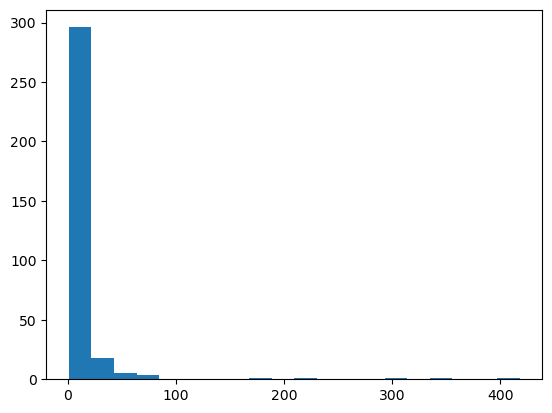

In [16]:
meh = l1_norm_trans.fit_transform(df_codes_array)
meh
plt.hist(meh[:,0], bins=20)

(array([17.,  0., 45.,  4.,  1., 48., 20., 52., 13.,  7., 29.,  6., 32.,
         0.,  0., 46.,  0.,  6.,  0.,  2.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

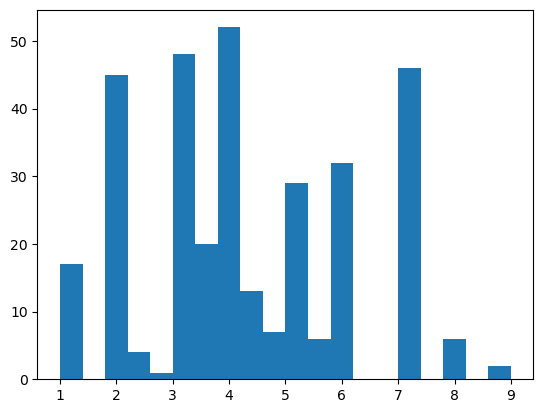

In [17]:
meh2 = l1_norm_trans.fit_transform(df_codes_array_norm_tweet)
meh2
plt.hist(meh2[:,0], bins=20)

## MDS

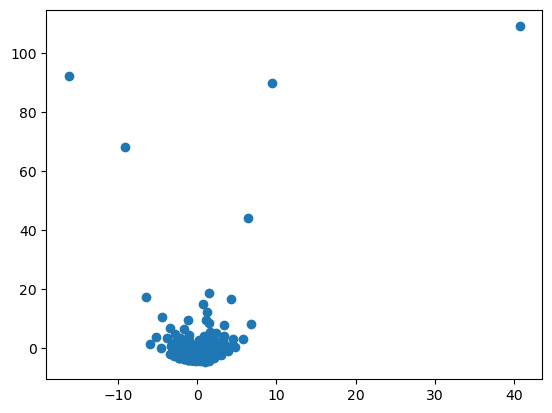

In [19]:
#let's do some mds
from sklearn.manifold import MDS

mds = MDS(n_components=2)
X = mds.fit_transform(df_codes_array)
plt.plot(X[:,0],X[:,1],'o')

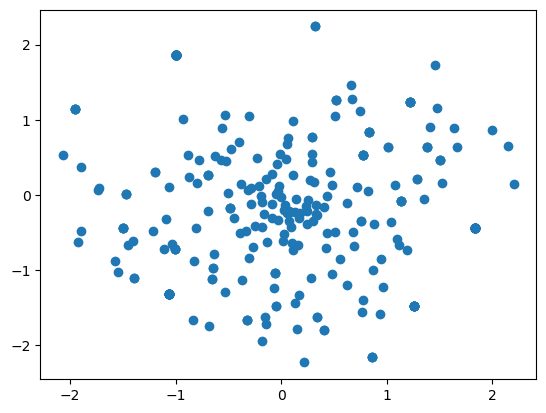

In [20]:
mds = MDS(n_components=2)
X = mds.fit_transform(df_codes_array_norm_tweet)
plt.plot(X[:,0],X[:,1],'o')

## Lower Dim stuff

In [24]:
df_codes_SO = df_codes[['amplification', 'SO impact', 'activation', 'strategic planning', 'troll']]
df_codes_SO_array = df_codes_SO.to_numpy()





In [25]:
diagram = persistence.fit_transform(df_codes_SO_array[None,:,:])
plot_diagram(diagram[0])

In [27]:
fig = map.plot_static_mapper_graph(pipe, df_codes_SO_array)
fig.show(config={'scrollZoom': True})